In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
data=pd.read_csv("C:\\Users\\DELL\\Downloads\\Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [4]:
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad']) 
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status']) 
data['Urban']= label_encoder.fit_transform(data['Urban'])

In [5]:
data.rename({'Taxable.Income':"Taxable_income"},axis=1,inplace=True)
data.head()

,Undergrad,Marital.Status,Taxable_income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [6]:
bins=[0,30000,100000]
name=["risky","not_risky"]
data["Tax"]=pd.cut(data.Taxable_income,bins,labels=name)
data.head()

,Undergrad,Marital.Status,Taxable_income,City.Population,Work.Experience,Urban,Tax
0,0,2,68833,50047,10,1,not_risky
1,1,0,33700,134075,18,1,not_risky
2,0,1,36925,160205,30,1,not_risky
3,1,2,50190,193264,15,1,not_risky
4,0,1,81002,27533,28,0,not_risky


In [7]:
data.drop("Taxable_income",axis=1,inplace=True)
data['Tax']= label_encoder.fit_transform(data['Tax'].astype(str))
data.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [8]:
x=data.iloc[:,0:5]
y=data.iloc[:,5]

In [9]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [10]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Tax, Length: 600, dtype: int32

In [11]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [12]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

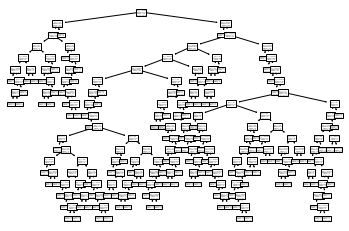

In [13]:
tree.plot_tree(model);


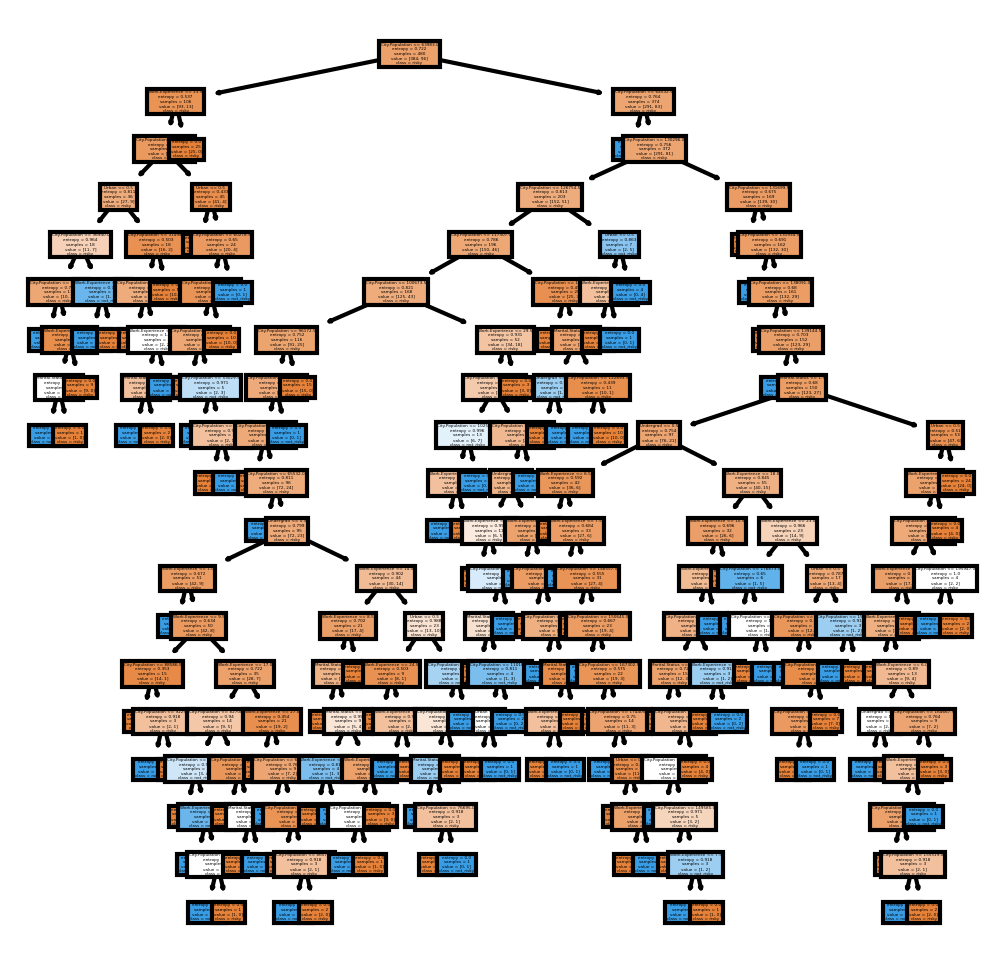

In [16]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['risky', 'not_risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [17]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    98
1    22
dtype: int64

In [18]:
preds

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [19]:
pd.crosstab(y_test,preds)

col_0,0,1
Tax,,
0,75,17
1,23,5


In [20]:
np.mean(preds==y_test)

0.6666666666666666

Accuracy of model is around 67%